Dataset Link: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset/data

In [9]:
!pip install kaggle -q

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


**Importing the Dependencies**

In [39]:
import os
import json

import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

**Data Collection**

In [3]:
import json

with open("kaggle.json", "r") as f:
    kaggle_config = json.load(f)


In [9]:
#kaggle_config = json.load(open("kaggle.json"))  # login to kaggle > verify account > profile icon > settings > create new API token

In [4]:
kaggle_config.keys()

dict_keys(['username', 'key'])

In [6]:
import os

In [7]:
# Set the environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_config['username']
os.environ['KAGGLE_KEY'] = kaggle_config['key']

In [8]:
# loadig the dataset using kaggle api
!kaggle datasets download notshrirang/spotify-million-song-dataset

Dataset URL: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
License(s): CC0-1.0




  0%|          | 0.00/20.7M [00:00<?, ?B/s]
  5%|▍         | 1.00M/20.7M [00:01<00:21, 951kB/s]
 10%|▉         | 2.00M/20.7M [00:01<00:16, 1.20MB/s]
 14%|█▍        | 3.00M/20.7M [00:02<00:12, 1.44MB/s]
 19%|█▉        | 4.00M/20.7M [00:02<00:11, 1.53MB/s]
 24%|██▍       | 5.00M/20.7M [00:03<00:10, 1.60MB/s]
 29%|██▉       | 6.00M/20.7M [00:05<00:16, 928kB/s] 
 34%|███▍      | 7.00M/20.7M [00:06<00:13, 1.04MB/s]
 39%|███▊      | 8.00M/20.7M [00:07<00:13, 985kB/s] 
 43%|████▎     | 9.00M/20.7M [00:08<00:12, 991kB/s]
 48%|████▊     | 10.0M/20.7M [00:09<00:12, 921kB/s]
 53%|█████▎    | 11.0M/20.7M [00:11<00:10, 928kB/s]
 58%|█████▊    | 12.0M/20.7M [00:12<00:11, 803kB/s]
 63%|██████▎   | 13.0M/20.7M [00:13<00:08, 923kB/s]
 68%|██████▊   | 14.0M/20.7M [00:14<00:06, 1.07MB/s]
 72%|███████▏  | 15.0M/20.7M [00:14<00:05, 1.19MB/s]
 77%|███████▋  | 16.0M/20.7M [00:16<00:04, 1.05MB/s]
 82%|████████▏ | 17.0M/20.7M [00:16<00:03, 1.18MB/s]
 87%|████████▋ | 18.0M/20.7M [00:17<00:02, 1.25MB/s]
 92%|██

In [10]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
import zipfile
with zipfile.ZipFile('spotify-million-song-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [15]:
# loading the dataset to a pandas dataframe
import pandas as pd
df = pd.read_csv("spotify_millsongdata.csv")


**Initial Understanding**

In [16]:
df.shape

(57650, 4)

In [17]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [19]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [20]:
# Top artists and songs
top_artists = df['artist'].value_counts().head(10)
print("\nTop 10 Artists:")
print(top_artists)


Top 10 Artists:
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Alabama             187
Cher                187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [21]:
df = df.sample(10000)

df = df.drop('link', axis=1).reset_index(drop=True)

In [22]:
df.shape

(10000, 3)

In [23]:
df.head()

,artist,song,text
0,Faith Hill,It All Comes Down To Love,Straight shot of misery \r\nSome days make a ...
1,Foo Fighters,Resolve,"Something that I felt today, something that I ..."
2,Paul McCartney,At The Mercy,"At the mercy, at the mercy \r\nAt the mercy o..."
3,Tragically Hip,Fifty-Mission Cap,"Bill Barilko disappeared that summer, \r\nHe ..."
4,Ed Sheeran,Sing,It's late in the evening \r\nGlass on the sid...


In [28]:
# WordCloud for song lyrics
from wordcloud import WordCloud
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_lyrics)

WordCloud to visualize the most common words in the lyrics.

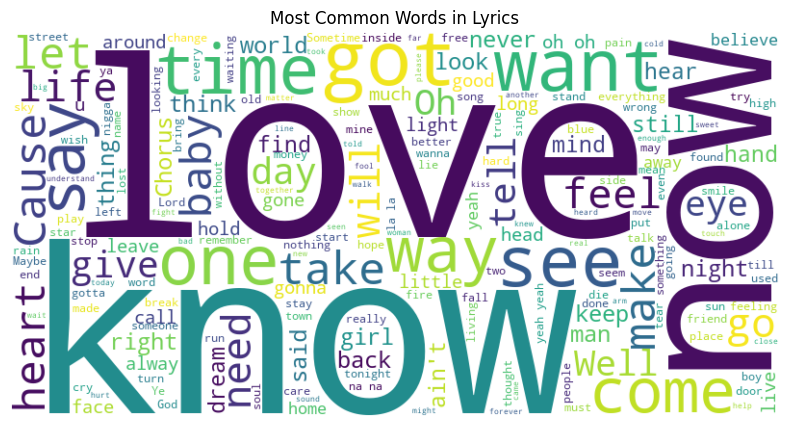

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Lyrics")
plt.show()

**Data Preprocessing**

In [32]:
# download nltk data
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\ASUS
[nltk_data]     Vivobook\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\ASUS
[nltk_data]     Vivobook\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\ASUS
[nltk_data]     Vivobook\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [36]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [40]:
# Apply preprocessing to lyrics
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [ ]:
df.head()

,artist,song,text,cleaned_text
0,Neil Young,Beautiful Bluebird (2007),One morning when I was ridin' in my old pickup...,one morning ridin old pickup truck beautiful b...
1,Bee Gees,Every Christian Lion Hearted Man Will Show You,Oh solo Dominique [Repeat: x4] \r\n \r\nTake...,oh solo dominique repeat x take hand said stan...
2,Lenny Kravitz,For The First Time,I want to fall in love again \r\nFor the firs...,want fall love first time makes kind wonder yo...
3,Olly Murs,The One,Try to walk \r\nTry to run \r\nTry to fool ...,try walk try run try fool everyone imply fine ...
4,Stone Temple Pilots,Peacoat,You love me more than those dirty clothes \r\...,love dirty clothes cause cant imagine someone ...


In [41]:
# Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [42]:
# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [43]:
# Recommendation Function
def recommend_songs(song_name, cosine_sim=cosine_sim, df=df, top_n=5):
    # Find the index of the song
    idx = df[df['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return "Song not found in the dataset!"   # can be reworked to compare for songs not present in the dataset
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # Get song indices
    song_indices = [i[0] for i in sim_scores]

    # Return top n similar songs
    return df[['artist', 'song']].iloc[song_indices]

In [44]:
df["song"][2]

'At The Mercy'

In [45]:
# Example Recommendation
print("\nRecommendations for the song 'Blinded By Rainbows':")
recommendations = recommend_songs("For The First Time") # df["song"][2]
print(recommendations)


Recommendations for the song 'Blinded By Rainbows':
               artist                                 song
9513    Kirk Franklin                           First Love
2978    One Direction                      Loved You First
269   The Temptations  The First Time Ever I Saw Your Face
3144            Adele                           First Love
3129       Whitesnake                     Looking For Love
